<a href="https://colab.research.google.com/github/Zorawar920/sas_application/blob/feat_CP8117P11-7/SAS_CP8117P11_12_%26_CP8117P11_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Speech Emotion Detection Classifier for SAS Application.

> For Sending SOS to the Emergency contacts of the user/customer using the voice we are using Speech Emotion Recoginition (SER) method which is an act to recognize human emotion and affective states from Speech and Voice. 


> This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch and thus from that tone and pitch we'll try to identify the emotion of user.










> RAVDESS(Ryerson Audio-Visual Database of Emotional Speech and Song)


> Link - https://zenodo.org/record/1188976#.YMDH7_kzZPY 


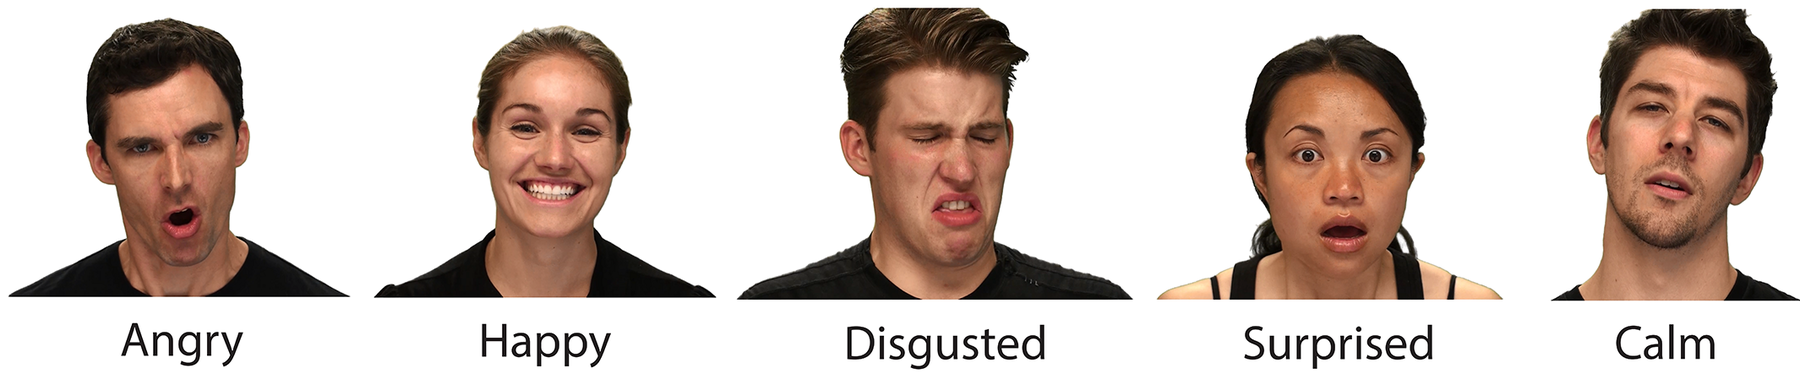

### Information about RAVDESS Dataset :


> RAVEDESS is the dataset that we are going to use for building our machine learning model. It is the popular dataset because of its quality of speakers, recording and it has 24 actors of different genders.


Here is the filename identifiers as per the official RAVDESS website:


* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).




##### Citation - Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

### Importing Libraries

In [68]:
#import modules and packages
import os
import sys

#To play sound in notebook
import IPython.display as ipd  
from IPython.display import Audio
import numpy as np # linear algebra
import pandas as pd # data processing

#For plotting graphs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display
import soundfile as sf

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Data collection

In [49]:
#Mount the drive on which the dataset is uploaded
from google.colab import drive
drive.mount('/content/drive/')
print("Mouting of Drive is Successful !!")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Mouting of Drive is Successful !!


In [52]:
# load the dataset RAVEDASS
Ravdess = '/content/drive/MyDrive/Dataset/RAVDESS'
print("Dataset loaded successfully!!!\n\n")
audio_file = os.listdir(Ravdess)
audio_file.sort()

# How many actors are there in dataset
print("Dataset folders and actors")
print(audio_file)

Dataset loaded successfully!!!


Dataset folders and actors
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


## Data Extraction and Data Preparation (Cleaning)



> Data Preparation for furhter use

1.   loading the dataset and dataframe to get information about files and actors
2.   Also mentioning the emotions to get idea.





In [53]:
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list.sort()

file_emotion = []
file_path = []
actor_name = []

for dir in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    # dir = ['Actor_'+str(i).zfill(2) for i in range(1, 25)]
    actor = os.listdir(Ravdess+"/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        actor_name.append(dir)
        filepath = Ravdess+"/" + dir + '/' + file
        file_path.append("..."+filepath[30:])
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# datafrmae for name of actors
actor_name_df = pd.DataFrame(actor_name, columns=['Actor'])

Ravdess_df = pd.concat([path_df,emotion_df,actor_name_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

,Path,Emotions,Actor
0,.../RAVDESS/Actor_01/03-01-02-02-02-01-01.wav,calm,Actor_01
1,.../RAVDESS/Actor_01/03-01-04-01-02-01-01.wav,sad,Actor_01
2,.../RAVDESS/Actor_01/03-01-03-02-02-02-01.wav,happy,Actor_01
3,.../RAVDESS/Actor_01/03-01-02-01-01-01-01.wav,calm,Actor_01
4,.../RAVDESS/Actor_01/03-01-03-02-01-01-01.wav,happy,Actor_01
...,...,...,...
1435,.../RAVDESS/Actor_24/03-01-08-02-02-02-24.wav,surprise,Actor_24
1436,.../RAVDESS/Actor_24/03-01-07-02-02-01-24.wav,disgust,Actor_24
1437,.../RAVDESS/Actor_24/03-01-07-02-01-01-24.wav,disgust,Actor_24
1438,.../RAVDESS/Actor_24/03-01-07-02-02-02-24.wav,disgust,Actor_24




### Extracting information from the dataset.






Data preparation (Cleaning) for analysis an for further use

In [54]:
actors = ['Actor_'+str(i).zfill(2) for i in range(1, 25)]
# print(actors)
columns = ['File', 'Modality', 'Vocal', 'Emotion', 'Intensity', 'Statement', 'Repetition','Actor']
file_classification_df = pd.DataFrame(columns = columns)
files = []
location = []
for actor in actors:
    files.extend(os.listdir(Ravdess+"/"+actor))
    # print(actor)
    # location.append(Ravdess+"/"+actor)
file_classification_df['File'] = files
file = files[0]
for i in range(len(files)):
    file = files[i]
    integer_list = list(map(int, file.split('.')[0].split('-')))
    file_classification_df.loc[i, file_classification_df.columns[1:]] = integer_list
    # file_classification_df.loc[i,"location"] = 


file_classification_df.Modality.replace({1 : 'full-AV', 2 : 'video-only', 3 : 'audio-only'}, inplace=True)
file_classification_df.Vocal.replace({1 : 'speech', 2 :'song'}, inplace=True)
file_classification_df.Emotion.replace({1 : 'neutral', 2 : 'calm', 3 : 'happy',4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 :'surprised'}, inplace=True)
file_classification_df.Intensity.replace({1 : 'normal', 2 : 'strong'}, inplace=True)
file_classification_df.Statement.replace({1 : "Kids are talking by the door", 2: "Dogs are sitting by the door"}, inplace=True)
file_classification_df.Repetition.replace({1 : '1st repetition', 2 : '2nd repetition'}, inplace=True)
file_classification_df

# Here the breakdown of the audio file is done on the basis of all the information as follows.

,File,Modality,Vocal,Emotion,Intensity,Statement,Repetition,Actor
0,03-01-02-02-02-01-01.wav,audio-only,speech,calm,strong,Dogs are sitting by the door,1st repetition,1
1,03-01-04-01-02-01-01.wav,audio-only,speech,sad,normal,Dogs are sitting by the door,1st repetition,1
2,03-01-03-02-02-02-01.wav,audio-only,speech,happy,strong,Dogs are sitting by the door,2nd repetition,1
3,03-01-02-01-01-01-01.wav,audio-only,speech,calm,normal,Kids are talking by the door,1st repetition,1
4,03-01-03-02-01-01-01.wav,audio-only,speech,happy,strong,Kids are talking by the door,1st repetition,1
...,...,...,...,...,...,...,...,...
1435,03-01-08-02-02-02-24.wav,audio-only,speech,surprised,strong,Dogs are sitting by the door,2nd repetition,24
1436,03-01-07-02-02-01-24.wav,audio-only,speech,disgust,strong,Dogs are sitting by the door,1st repetition,24
1437,03-01-07-02-01-01-24.wav,audio-only,speech,disgust,strong,Kids are talking by the door,1st repetition,24
1438,03-01-07-02-02-02-24.wav,audio-only,speech,disgust,strong,Dogs are sitting by the door,2nd repetition,24


In [55]:
# counting number of files in dataset for various emotions
file_classification_df['Emotion'].value_counts().sort_index()

angry        192
calm         192
disgust      192
fearful      192
happy        192
neutral       96
sad          192
surprised    192
Name: Emotion, dtype: int64

In [56]:
# counting number of files in dataset for various Intensity
file_classification_df['Intensity'].value_counts().sort_index()

normal    768
strong    672
Name: Intensity, dtype: int64

In [80]:
# counting number of files in dataset based on gender

dir_list = os.listdir(Ravdess)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(Ravdess + "/" + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(Ravdess+"/" + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
# RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
print(RAV_df.labels.value_counts())

male_neutral       144
female_neutral     144
male_surprise       96
female_sad          96
male_fear           96
female_happy        96
male_disgust        96
male_angry          96
male_happy          96
female_fear         96
male_sad            96
female_disgust      96
female_angry        96
female_surprise     96
Name: labels, dtype: int64


In [81]:
# Displaying files in dataset with emotion based on gender
RAV_df

,gender,emotion,labels,source,path
0,male,neutral,male_neutral,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_0...
1,male,sad,male_sad,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_0...
2,male,happy,male_happy,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_0...
3,male,neutral,male_neutral,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_0...
4,male,happy,male_happy,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_0...
...,...,...,...,...,...
1435,female,surprise,female_surprise,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_2...
1436,female,disgust,female_disgust,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_2...
1437,female,disgust,female_disgust,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_2...
1438,female,disgust,female_disgust,RAVDESS,/content/drive/MyDrive/Dataset/RAVDESS/Actor_2...


## Data analysis and Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


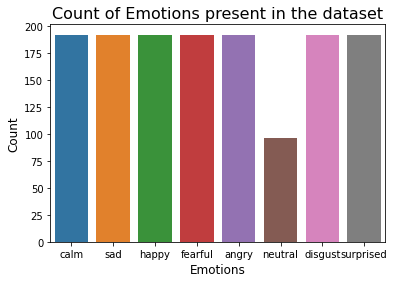

<Figure size 1800x1080 with 0 Axes>

In [59]:
plt.title('Count of Emotions present in the dataset', size=16)
sns.countplot(file_classification_df['Emotion'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.figure(figsize=(25, 15))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots,spectograms and chromagraph for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.

* Spectograms - A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

* Chromagraphs - The chroma feature is a descriptor, which represents the tonal content of a musical audio signal in a condensed form. 
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.


<class 'numpy.ndarray'> <class 'int'>
(72838,) 22050


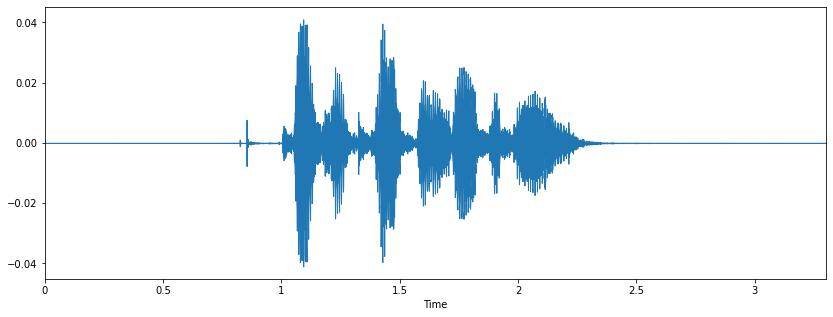

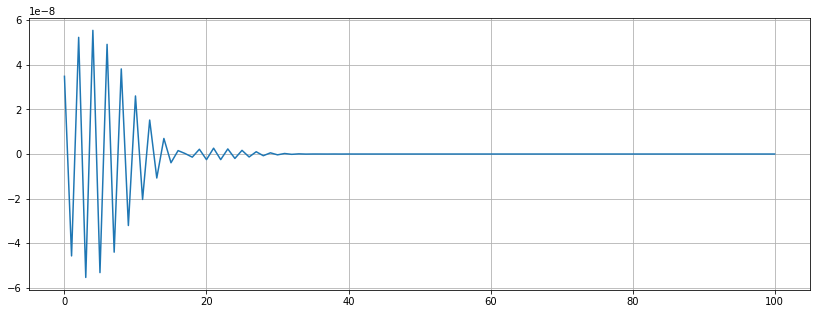

In [70]:
# Analyzing a Calm Track
Audio1 = '/content/drive/MyDrive/Dataset/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav'
x , sr = librosa.load(Audio1)
# print the types
print(type(x), type(sr))
print(x.shape, sr)

#plot the signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


#zooming in
n0 = 12000
n1 = 12101
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


#playing the audio
Audio(Audio1)


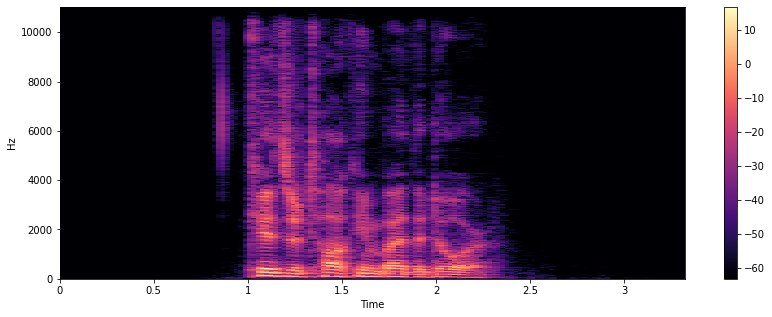

In [61]:
# display a spectrogram using. librosa.display.specshow
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

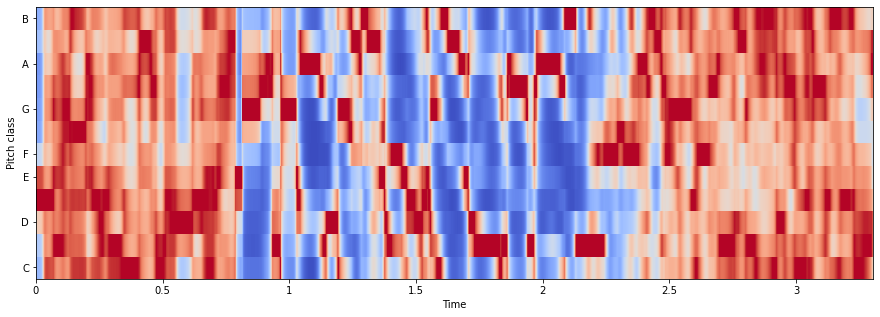

In [62]:
#chromagraph is displayed
hop_length=12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

<class 'numpy.ndarray'> <class 'int'>
(80931,) 22050


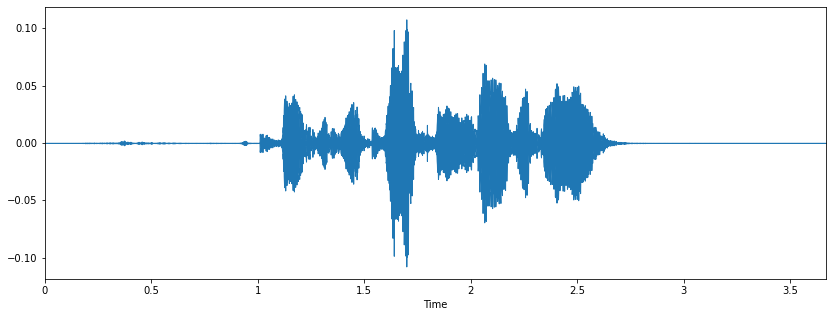

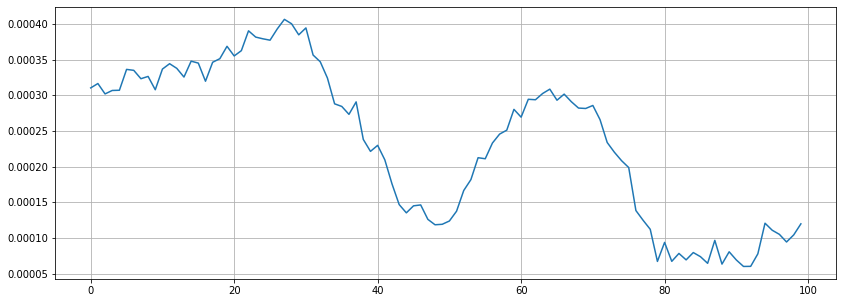

In [106]:
# Analyzing a Fearful Track
Audio2 = '/content/drive/MyDrive/Dataset/RAVDESS/Actor_01/03-01-06-01-01-01-01.wav'
x , sr = librosa.load(Audio2)
# print the types
print(type(x), type(sr))
print(x.shape, sr)

#plot the signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)



#zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

#playing the audio
Audio(Audio2)

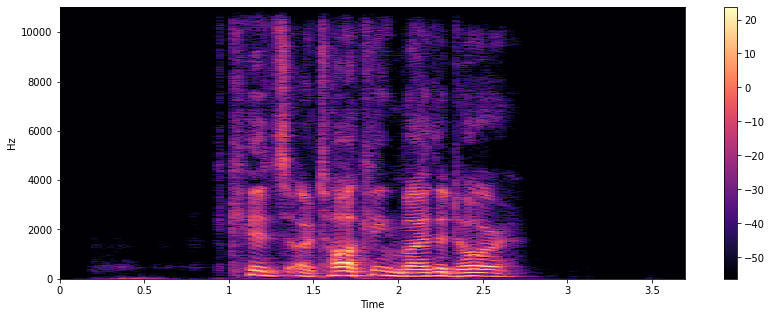

In [43]:
# melspectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

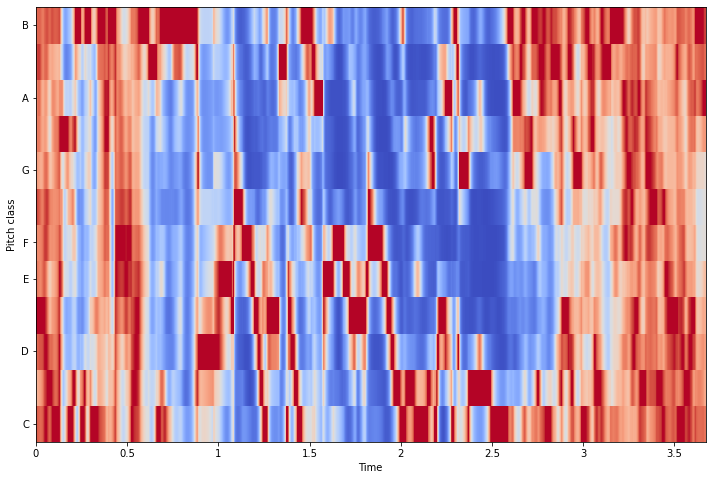

In [44]:
# chromagraph
hop_length=26
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(12, 8))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.figure(figsize=(14, 5))
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    # plt.figure(figsize=(14, 5))
    plt.colorbar()

    # X = librosa.stft(data)
    # Xdb = librosa.amplitude_to_db(abs(X))
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # plt.colorbar()

def create_cromagram(data,sr):
  #chromagraph is displayed
  hop_length=12
  chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=hop_length)
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

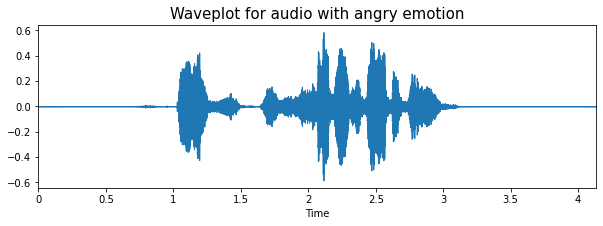

<Figure size 1008x360 with 0 Axes>

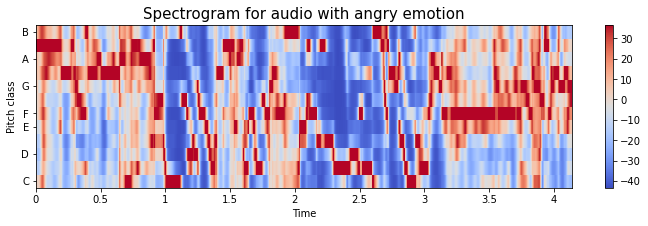

In [104]:
emotion='angry'
path = np.array(RAV_df.path[RAV_df.emotion==emotion])[2]

data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_cromagram(data, sampling_rate)
Audio(path)